In [1]:
#Use Python’s Yfinance Package to import the last ten
#(10) years of daily price data (the Open and the Close
#Prices for each day) for at least five (5) stocks of your
#choice. BE SURE THE STOCKS YOU CHOOSE HAVE
#THIS DATA AVAILABLE FOR ALL OF THE NORMAL
#TRADING DAYS IN THE LAST TEN (10) YEARS!
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
import numpy as np
import datetime as dt

In [2]:
#SSNLF-->Samsung ,HE-->Hawaiian
df1=pdr.get_data_yahoo('AAPL','2011-01-01','2021-10-31')
df1=df1[['Open','Close']]#drop all columns except open and close(rereturn only open and close columns)
df1=df1.rename(columns={'Open':'Open_AAPL','Close':'Close_AAPL'})#rename columns

df2=pdr.get_data_yahoo('MSFT','2011-01-01','2021-10-31')
df2=df2[['Open','Close']]
df2=df2.rename(columns={'Open':'Open_MSFT','Close':'Close_MSFT'})

df3=pdr.get_data_yahoo('SSNLF','2011-01-01','2021-10-31')
df3=df3[['Open','Close']]
df3=df3.rename(columns={'Open':'Open_SSNLF','Close':'Close_SSNLF'})

df4=pdr.get_data_yahoo('HE','2011-01-01','2021-10-31')
df4=df4[['Open','Close']]
df4=df4.rename(columns={'Open':'Open_HE','Close':'Close_HE'})

df5=pdr.get_data_yahoo('SONY','2011-01-01','2021-10-31')
df5=df5[['Open','Close']]
df5=df5.rename(columns={'Open':'Open_SONY','Close':'Close_SONY'})
#Join the individual tables containing the price data for the individual stocks into a single data table indexed by date
df=df1.merge(df2,on='Date')
df=df.merge(df3,on='Date')
df=df.merge(df4,on='Date')
df=df.merge(df5,on='Date')
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_AAPL,Close_AAPL,Open_MSFT,Close_MSFT,Open_SSNLF,Close_SSNLF,Open_HE,Close_HE,Open_SONY,Close_SONY
Date,,,,,,,,,,
2010-12-31,11.533929,11.520000,27.799999,27.910000,13.20,13.20,23.000000,22.790001,35.520000,35.709999
2011-01-03,11.630000,11.770357,28.049999,27.980000,13.20,13.20,22.900000,22.920000,36.169998,36.380001
2011-01-04,11.872857,11.831786,27.940001,28.090000,13.20,13.20,23.270000,23.850000,36.360001,36.160000
2011-01-05,11.769643,11.928571,27.900000,28.000000,13.20,13.20,23.850000,23.809999,35.810001,36.209999
2011-01-06,11.954286,11.918929,28.040001,28.820000,16.60,16.60,23.790001,23.870001,36.270000,36.009998
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,148.679993,148.639999,309.359985,308.130005,57.75,57.75,41.459999,40.990002,114.529999,115.300003
2021-10-26,149.330002,149.320007,311.000000,310.109985,57.75,57.75,41.099998,40.669998,117.000000,116.529999
2021-10-27,149.360001,148.850006,316.000000,323.170013,57.75,57.75,40.880001,40.680000,114.879997,113.230003


In [3]:
#Slice off the first three (3) years of daily price data.
#Retain the Close Prices and convert them into daily return values. Drop any NaN’s as needed. 
three_years=df.loc['2011-01-01':'2013-12-31']#take just 3 years
three_years=three_years[['Close_AAPL','Close_MSFT','Close_SSNLF','Close_HE','Close_SONY']]
three_years['Return_AAPL']=three_years['Close_AAPL'].pct_change()#converted close prices into reurn pricess
three_years['Return_MSFT']=three_years['Close_MSFT'].pct_change()
three_years['Return_SSNLF']=three_years['Close_SSNLF'].pct_change()
three_years['Return_HE']=three_years['Close_HE'].pct_change()
three_years['Return_SONY']=three_years['Close_SONY'].pct_change()
three_years=three_years[['Return_AAPL','Return_MSFT','Return_SSNLF','Return_HE','Return_SONY']]
three_years=three_years.dropna()
three_years

,Return_AAPL,Return_MSFT,Return_SSNLF,Return_HE,Return_SONY
Date,,,,,
2011-01-04,0.005219,0.003931,0.000000,0.040576,-0.006047
2011-01-05,0.008180,-0.003204,0.000000,-0.001677,0.001383
2011-01-06,-0.000808,0.029286,0.257576,0.002520,-0.005523
2011-01-07,0.007161,-0.007634,0.000000,0.037285,0.000833
2011-01-10,0.018833,-0.013287,0.000000,-0.014136,0.003330
...,...,...,...,...,...
2013-12-24,-0.004245,0.012562,0.057692,0.002306,-0.017455
2013-12-26,-0.006641,0.009709,0.000000,-0.008052,-0.008023
2013-12-27,-0.006757,-0.004006,0.000000,0.003092,-0.012709


In [4]:
#YOU MAY NEED TO CONVERT THIS DATAFRAME INTO A MATRIX AND THEN TRANSPOSE IT IN ORDER TO RUN ALL OF
#YOUR CODE. BE SURE TO KEEP THE OTHER SEVEN (7) YEARS OF DAILY PRICE DATA AROUND FOR LATER use
matrix_of_return_values=np.asmatrix(three_years)
matrix_of_return_values=matrix_of_return_values.T

In [5]:
#Generate at least ten thousand (10,000) different vectors of weights (percentages), each of whose sum is one (1) and each of whose length is equal to your
#number of stocks. This is the same as asking you to simulate at least ten thousand (10,000) different portfolio allocations as each of the ten thousand
#(10,000) different vectors corresponds to a unique portfolio allocation possibility.

no_of_asset_classes=5
no_of_portfolios = 10000

collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /=sum(random_asset_weights)
    random_asset_weights=np.asmatrix(random_asset_weights)
    return random_asset_weights 
#get_random_asset_weights(no_of_asset_classes)

#Calculate the overall portfolio mean, the overall portfolio standard deviation, and the Sharpe ratio of
#each of the portfolio allocation possibilities obtained in the previous step. You may assume a risk-free
#return rate of zero percent (0%). BE SURE TO CAREFULLY KEEP TRACK OF AND REMEMBER ALL OF THE DIFFERENT 
def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances =np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean =asset_weights*asset_means #t
    portfolio_mean=portfolio_mean.item()
    portfolio_standard_deviation = np.sqrt(asset_weights*asset_covariances*asset_weights.T) #t
    portfolio_standard_deviation=portfolio_standard_deviation.item()
    portfolio_sharpe_ratio =portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio
#get_portfolio_statistics(get_random_asset_weights(no_of_asset_classes),matrix_of_return_values)

while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    portfolio_means.append(get_portfolio_statistics(random_asset_weights,matrix_of_return_values)[0])
    portfolio_standard_deviations.append( get_portfolio_statistics(random_asset_weights,matrix_of_return_values)[1])
    portfolio_sharpe_ratios.append( get_portfolio_statistics(random_asset_weights,matrix_of_return_values)[2])

#Determine which vector of asset weights (percentages) results in the portfolio allocation possibility of highest Sharpe ratio. Create a Pandas
#DataFrame with a single row containing these asset weights (percentages) in which the columns are labeled with the asset names and the row has index
#equal to the last date represented in the dataset you used to perform the portfolio optimization.
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))
print(collection_of_random_asset_weights[index])#print asset weights of higest sharp ratio using index
some_weights=pd.DataFrame(collection_of_random_asset_weights[index],columns=['AAPL','MSFT','SSNLF','HE','SONY'],index=[three_years.last_valid_index()])
some_weights

[[0.46084387 0.24421295 0.19844564 0.0923016  0.00419592]]


,AAPL,MSFT,SSNLF,HE,SONY
2013-12-31,0.460844,0.244213,0.198446,0.092302,0.004196


0.06876556043335963


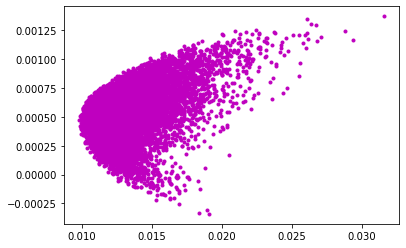

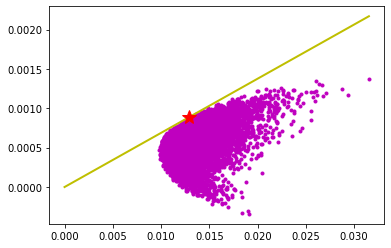

0.012930812526102743 0.0008891945702161619


In [6]:

#Make a scatterplot showing the corresponding values (x, y) of the overall portfolio standard deviation and overall portfolio mean for each of your portfolio allocation possibilities.
#Report the maximum value of Sharpe ratio achieved by any of your portfolio allocation possibilities. (This is the value of the Sharpe ratio corresponding to the
#vector of asset weights [percentages] you found while completing the task in the fifth bullet point above.)

print(portfolio_sharpe_ratios[index])#Sharpe ratio of the portfolio of highest Sharpe ratio
import matplotlib.pyplot as plt
#show distrbution of protofolio
plt.plot(portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'm') 
plt.show()

x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot( portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'm')
plt.plot(x, y, '-', linewidth = 2, color = 'y')
plt.plot(portfolio_standard_deviations[index],portfolio_means[index],color="red",marker="*",markersize = 15)
plt.show()

print(portfolio_standard_deviations[index],portfolio_means[index])#very best protofolio


In [7]:
#. Give a complete conceptual description of the meaning of the Sharpe ratio as it relates to the theory of portfolio optimization. Why do portfolio
#managers seek to maximize this measure?
#Answer..................................................
# the sharp ratio calculate amount of reward each per risk , so the manager seek to maximaize this measure because when sharp ratio is high then return from investment is high,
#If an investor wants to manage their risk, 
#the CAPM is supposed to help by using it to build the portfolio. 
#If it were to be used perfectly to optimize the portfolio's return relative to risk, 
#it would exist on a curve call the efficient frontier. 


In [8]:
#Black pelt
#mark-to-market
#when i have 10000  and how much mony i can put it on each stocks
capital=10000
allocations =capital*some_weights
allocations


,AAPL,MSFT,SSNLF,HE,SONY
2013-12-31,4608.438744,2442.129544,1984.456443,923.016042,41.959226


In [9]:
#Share amounts per Fund Unit (fractional shares are fine):
print(df['Open_AAPL'].loc[some_weights.last_valid_index()]) 
print(df['Open_MSFT'].loc[some_weights.last_valid_index()])
print(df['Open_SSNLF'].loc[some_weights.last_valid_index()])
print(df['Open_HE'].loc[some_weights.last_valid_index()])
print(df['Open_SONY'].loc[some_weights.last_valid_index()])
no_of_shares = allocations /df[[f'Open_{sym}'for sym in some_weights.columns]].loc[some_weights.last_valid_index()].values
no_of_shares



19.791786193847656
37.400001525878906
27.5
26.049999237060547
17.5


,AAPL,MSFT,SSNLF,HE,SONY
2013-12-31,232.846025,65.297579,72.162052,35.432479,2.39767


In [10]:
#display your portfolio-fund as asingle instrument for grader to evaluate. It should only have the columns Open and Close
seven_years=df.loc['2013-12-31':]
seven_years['Open']=seven_years['Open_AAPL']*no_of_shares['AAPL'].iloc[0]+seven_years['Open_MSFT']*no_of_shares['MSFT'].iloc[0]+seven_years['Open_SSNLF']*no_of_shares['SSNLF'].iloc[0]+seven_years['Open_HE']*no_of_shares['HE'].iloc[0]+seven_years['Open_SONY']*no_of_shares['SONY'].iloc[0]
seven_years['Close']=seven_years['Close_AAPL']*no_of_shares['AAPL'].iloc[0]+seven_years['Close_MSFT']*no_of_shares['MSFT'].iloc[0]+seven_years['Close_SSNLF']*no_of_shares['SSNLF'].iloc[0]+seven_years['Close_HE']*no_of_shares['HE'].iloc[0]+seven_years['Close_SONY']*no_of_shares['SONY'].iloc[0]
seven_years=seven_years[['Open','Close']]
seven_years

<ipython-input-10-84a8d852a6ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven_years['Open']=seven_years['Open_AAPL']*no_of_shares['AAPL'].iloc[0]+seven_years['Open_MSFT']*no_of_shares['MSFT'].iloc[0]+seven_years['Open_SSNLF']*no_of_shares['SSNLF'].iloc[0]+seven_years['Open_HE']*no_of_shares['HE'].iloc[0]+seven_years['Open_SONY']*no_of_shares['SONY'].iloc[0]
<ipython-input-10-84a8d852a6ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven_years['Close']=seven_years['Close_AAPL']*no_of_shares['A

,Open,Close
Date,,
2013-12-31,10000.000000,10057.467668
2014-01-02,9899.932649,9847.487917
2014-01-03,9847.974742,9733.362103
2014-01-06,9700.376529,9701.226041
2014-01-07,9718.027201,9697.129582
...,...,...
2021-10-25,60730.997518,60626.563537
2021-10-26,60982.605085,60905.799218
2021-10-27,61303.199955,61641.591614


Absolute Return Of Our Protofolio:524.16% 
CAGR Of Our Protofolio:18.41% 
information Ratio Of Our Protofolio:1.19



<AxesSubplot:xlabel='Date'>

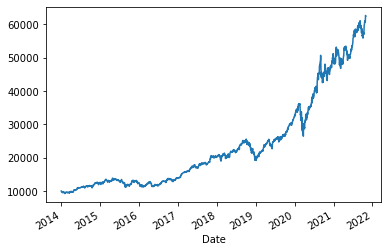

In [11]:
# Print the Absolute Return, Compound Annual Growth Rate, and Information Ratio for your fund.
absolute_return = (seven_years['Close'].iloc[-1]-capital)/capital
CAGR = ((seven_years['Close'].iloc[-1]/capital)**(365/(df.index[-1] - df.index[0]).days))-1
information_ratio = (seven_years.Close.pct_change().mean()/seven_years.Close.pct_change().std())*((252) **0.5)
s=f"""Absolute Return Of Our Protofolio:{absolute_return*100:.2f}% 
CAGR Of Our Protofolio:{CAGR*100:.2f}% 
information Ratio Of Our Protofolio:{information_ratio:.2f}
"""
print(s)
seven_years.Close.plot()

In [12]:
#Black Belt Part 2. Building a simplified tradeable forecasting model
#Create labels for predicting next day close as +1.0 for an increase, -1.0 for a decrease.
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
short_time=5
long_time=15
seven_years['Close_Short_Rolling']=seven_years['Close'].rolling(window=short_time).mean()
seven_years['Close_Long_Rolling']=seven_years['Close'].rolling(window=long_time).mean()
seven_years['window_diff']=seven_years['Close_Long_Rolling']-seven_years['Close_Short_Rolling']
seven_years['Open_1_Change'] =seven_years['Open']-seven_years['Open'].shift(1)
seven_years=seven_years.dropna()
seven_years

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,window_diff,Open_1_Change
Date,,,,,,
2014-01-22,9775.647197,9757.892573,9796.229713,9750.948126,-45.281587,54.353941
2014-01-23,9753.483088,9804.803465,9781.226131,9734.103846,-47.122285,-22.164109
2014-01-24,9875.504024,9748.984112,9757.495467,9727.536926,-29.958541,122.020937
2014-01-27,9785.565981,9728.755637,9758.546205,9727.229828,-31.316377,-89.938044
2014-01-28,9389.244131,9378.628003,9683.812758,9705.723292,21.910534,-396.321850
...,...,...,...,...,...,...
2021-10-25,60730.997518,60626.563537,60753.332833,58895.687267,-1857.645566,-294.929441
2021-10-26,60982.605085,60905.799218,60800.727892,59180.489387,-1620.238505,251.607568
2021-10-27,61303.199955,61641.591614,60979.035157,59482.296121,-1496.739036,320.594870


In [13]:
#Train-test-split your data using 30% of the data for the train, the remainder for the test.
X = seven_years.copy()
y=np.where(X.Close.shift(-1) >= X.Close,1,-1)
index=int(0.3*len(X))
X_train=X.iloc[:index]
X_test=X.iloc[index:]
y_train=y[:index]
y_test=y[index:]
logistic = LogisticRegression()
logistic =logistic.fit(X_train,y_train)
#Display your logistic regression coefficients for the grader to evaluate as the output of a cell.
pd.DataFrame(zip(X.columns, np.transpose(logistic.coef_)))
#print(X.Close.shift(-1))#next 
#print(X.Close)

,0,1
0,Open,[0.0023780202274289357]
1,Close,[-0.001982929855974357]
2,Close_Short_Rolling,[-0.0002551568828201664]
3,Close_Long_Rolling,[-0.00013669091819344323]
4,window_diff,[0.00011846596462628999]
5,Open_1_Change,[-0.0004014965227440487]


In [14]:
#Generate your predictions using your X_test data, and run a classification report or confusion matrix.
predictions = logistic.predict(X_test)#1 and -1 only
print( metrics.confusion_matrix(y_test, predictions))
print(logistic.score(X_test,y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

[[294 308]
 [323 447]]
0.5400874635568513
              precision    recall  f1-score   support

          -1       0.48      0.49      0.48       602
           1       0.59      0.58      0.59       770

    accuracy                           0.54      1372
   macro avg       0.53      0.53      0.53      1372
weighted avg       0.54      0.54      0.54      1372



In [15]:
#Create a results DataFrame by copying your X_test DataFrame, use this to gather your results through the next few instructions.
results=X_test.copy()

#Create a close-to-close price difference and place it in a column labeled c2c_price in your results DataFrame.
#Place your predictions, y_test true labels alongside the above in the results DataFrame.
results['c2c_price']=X_test.Close.shift(-1)-X_test.Close
results['Predictions']=predictions
results['True_Label']=y_test
#Think for a moment how you can use your close-toclose price difference to calculate a trade return for trading one unit of your fund at the current close
#price. Use your predictions and the c2c_price to figure out what that trade would result in, in terms of dollars returned per trade.
results['Returns']=results['c2c_price']*results['Predictions']#return per trade
#Generate a cumulative trading profit balance in dollar terms and save it to your Results DataFrame. 
results['Cum_Returns']=results['Returns'].cumsum()
results=results.dropna()
results

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,window_diff,Open_1_Change,c2c_price,Predictions,True_Label,Returns,Cum_Returns
Date,,,,,,,,,,,
2016-05-20,11524.794280,11571.529597,11539.565616,11487.299802,-52.265814,0.447709,35.400278,-1,1,-35.400278,-35.400278
2016-05-23,11607.773461,11606.929875,11538.971017,11494.881570,-44.089447,82.979182,206.789881,1,1,206.789881,171.389603
2016-05-24,11699.359873,11813.719756,11605.267734,11514.170961,-91.096774,91.586412,128.497501,-1,1,-128.497501,42.892102
2016-05-25,11873.387732,11942.217257,11684.515699,11544.528070,-139.987629,174.027858,26.367854,-1,1,-26.367854,16.524248
2016-05-26,11921.237719,11968.585112,11780.596320,11580.358610,-200.237709,47.849987,26.639057,-1,1,-26.639057,-10.114809
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22,61025.926958,60721.135832,60644.444112,58574.980586,-2069.463526,401.139083,-94.572296,1,-1,-94.572296,39587.878215
2021-10-25,60730.997518,60626.563537,60753.332833,58895.687267,-1857.645566,-294.929441,279.235682,1,1,279.235682,39867.113896
2021-10-26,60982.605085,60905.799218,60800.727892,59180.489387,-1620.238505,251.607568,735.792396,1,1,735.792396,40602.906292


Absolute Return Of Our Algorithmic Trading:525.98% 
Absolute Return Of Our buy and hold Trading:443.16% 
CAGR Of Our Algorithmic Trading:18.44% 
CAGR Of Our buy and hold Trading:16.90% 
information Ratio Of Our Algorithmic Trading:1.47
information Ratio Of Our buy and hold Trading:1.47



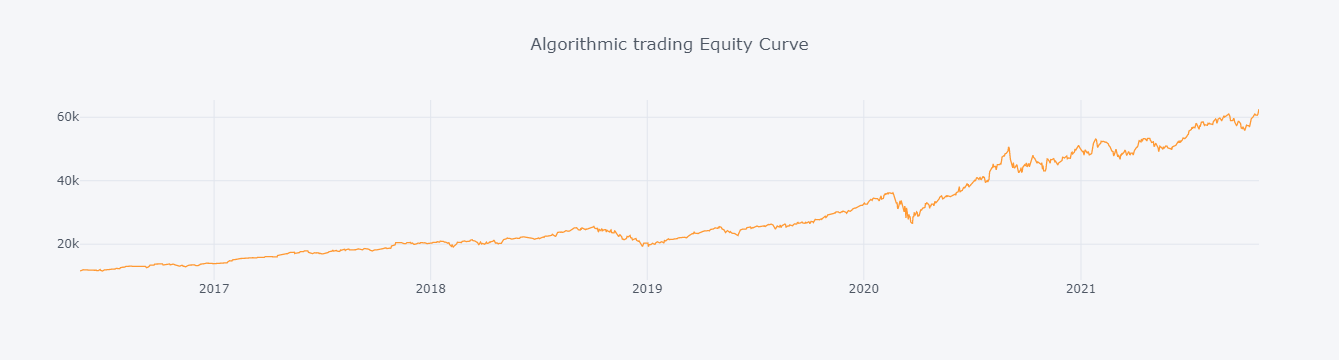

In [16]:
#Part 3. Evaluating our Simplified Algorithmic Trading Model.
#Calculate the absolute return, CAGR and IR for your optimized portfolio.
#Calculate the absolute return, CAGR and IR for your candidate algorithmic trading strategy returns above.
#Plot the Equity Curve for the above trading strategy using an appropriate starting value.

import cufflinks as cf
cf.set_config_file(offline=True)

absolute_return_at = (results['Close'].iloc[-1]-capital)/capital
CAGR_at = ((results['Close'].iloc[-1]/capital)**(365/(df.index[-1] - df.index[0]).days))-1
information_ratio_at = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)

absolute_return_bh = (results.Close.iloc[-1]-results.Open.iloc[0])/results.Open.iloc[0]
CAGR_bh = ((results.Close.iloc[-1]/results.Open.iloc[0])**(365/(df.index[-1] - df.index[0]).days))-1
information_ratio_bh = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)

s=f"""Absolute Return Of Our Algorithmic Trading:{absolute_return_at*100:.2f}% 
Absolute Return Of Our buy and hold Trading:{absolute_return_bh*100:.2f}% 
CAGR Of Our Algorithmic Trading:{CAGR_at*100:.2f}% 
CAGR Of Our buy and hold Trading:{CAGR_bh*100:.2f}% 
information Ratio Of Our Algorithmic Trading:{information_ratio_at:.2f}
information Ratio Of Our buy and hold Trading:{information_ratio_bh:.2f}
"""
print(s)
#Algorithmic trading Equity Curve
results.Close.iplot(title="Algorithmic trading Equity Curve")





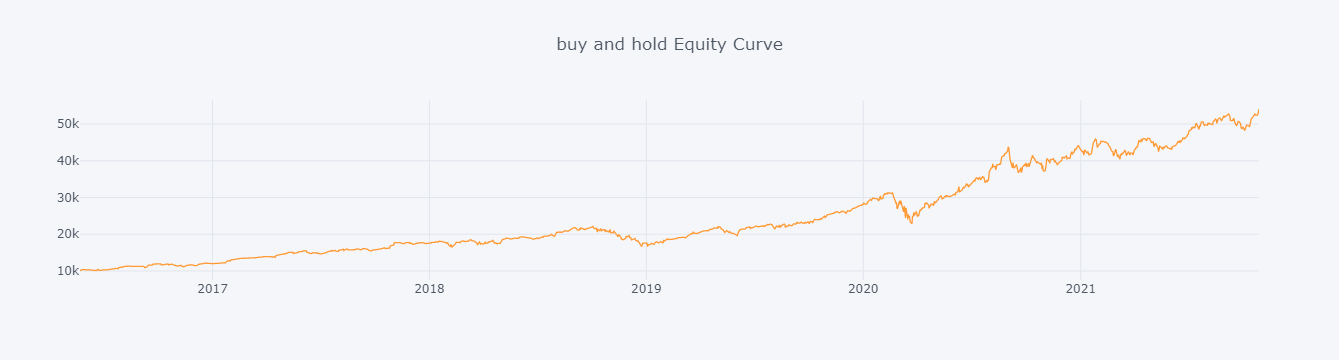

In [17]:
#buy and hold Equity Curve
((results.Close.pct_change().dropna()+1).cumprod()*capital).iplot(title="buy and hold Equity Curve")